# Problème de Poisson en 2D
Dans ce notebook Jupyter, on vous apprend à résoudre le problème de Poisson sur un domaine rectangulaire :

$$
\frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2} = g   \quad , \quad (x,y) \in [0,L_x]\times [0,L_y]
$$

Ici $g(x,y)$ est une fonction connue. Sur les bords du domaine, on supposera une condition aux limites de type Dirichlet :

$$
f(x,0) = C_{bord}(x,0) \quad , \quad x \in [0,L_x] \\
f(x,L_y) = C_{bord}(x,L_y) \quad , \quad x \in [0,L_x] \\
f(0,y) = C_{bord}(0,y) \quad , \quad y \in [0,L_y] \\
f(L_x,y) = C_{bord}(L_x,y) \quad , \quad y \in [0,L_y] 
$$

La fonction $C_{bord} (x,y)$ est connue sur le bord. Parfois il faudra le définir par segment comme dans le cours.  Pour résoudre ce problème à l'aide de la méthode des différences finies, on commence par définir un maillage, ici uniforme

$$
(x_i , y_j ) =  (i \delta x, j \delta y ) \quad \mbox{avec} \quad \delta x = \frac{L_x}{M_x} , \quad \delta y = \frac{L_y}{M_y} \quad \mbox{et}\quad i = 0, 1, \ldots , M_x \quad , \quad j=0,1,\ldots, M_y
$$

Ce maillage a $N=(M_x+1) (M_y +1)$ points aux total. Le nombre de points extérieurs (de bord) est $N_{ext} = 2 M_x + 2 M_y$. Le nombre de points intérieurs est $ N_{int}=(M_x-1) (M_y-1)$. On note

$$
f(x_i, y_j) = f_{i,j} \quad , \quad g(x_i, y_j) = g_{i,j}
$$

Sur les points extérieurs du domaine, on impose les conditions aux limites. Ainsi on arrive sur 

$$
f_{i,0} =  C_{bord}(x_i,0 ) \quad, \quad i=1,\ldots,M_x-1 \\
f_{i,M_y} =  C_{bord}(x_i,L_y ) \quad, \quad i=1,\ldots,M_x-1 \\
f_{0,j} =  C_{bord}(0,y_j ) \quad, \quad j=0,1,\ldots,M_y \\
f_{M_x,j} =  C_{bord}(L_x,y_j ) \quad, \quad j=0,1,\ldots,M_y \\
$$

ce qui fait exactement $N_{ext}$ équations algébriques. Sur tous les points intérieurs, on impose une version discrète de l'EDP de Poisson

$$
\frac{f_{i-1,j}-2 f_{i,j} + f_{i+1,j}}{\delta x^2} + \frac{f_{i,j-1}-2 f_{i,j} + f_{i,j+1}}{\delta y^2} = g_{i,j} \quad , \quad \left \{ \begin{array}{rcl} i &=& 1,\ldots,M_x-1 \\ j  &=& 1,\ldots,M_y-1 \end{array} \right . 
$$

soit avec la notation $a = 1/\delta x^2$, $b=1/\delta y^2$ et $c=-2 (a+b)$ :

$$
a f_{i-1,j} + b f_{i,j-1} + c f_{i,j} + b f_{i,j+1} + a f_{i,j+1} = g_{i,j} \quad , \quad \left \{ \begin{array}{rcl} i &=& 1,\ldots,M_x-1 \\ j  &=& 1,\ldots,M_y-1 \end{array} \right . 
$$

Ceci donne exactement $N_{int}$ équations algébriques. Afin de résoudre ce problème, on doit définir un grand système matriciel. Comme expliqué en cours, on peut écrire l'ensemble des équations sous forme matricielle 

$$
\mathbf{M} \mathbf{f} = \mathbf{g}
$$

Dans le grand vecteur (colonne) $\mathbf{f}$ on trouve les valeurs nodales $f_{i,j}$ recherchées, dans un ordre bien précis (ordre du cours)

$$
\mathbf{f} = \left [ \begin{array}{c}
f_{0,0} \\
f_{0,1} \\
\vdots \\
f_{0,M_y} \\
\hline
f_{1,0} \\
f_{1,1} \\
\vdots \\
f_{1,M_y} \\
\hline
\vdots \\ 
\vdots \\
\vdots \\
\vdots \\
\hline
f_{M_x,0} \\
f_{M_x,1} \\
\vdots \\
f_{M_x,M_y} 
\end{array}  \right ] 
$$

On peut remarquer que le nouvel indice $ind$ du point $(i,j)$ sera

$$
ind = i(My+1)+j
$$

et il varie dans l'interval $ind = 0,1,\ldots,N-1$ dans cette logique.  La grande matrice $\mathbf{M}$ est de taille $N \times N$ et a une structure par bloc 

$$
\mathcal{M} =  \left [ \begin{array} {c|c|c|c|c|c}
\mathbf{I} &  & &  &  &   \\
\hline
\mathbf{A} & \mathbf{BCB} & \mathbf{A} &  & & \\  
\hline
 &  \mathbf{A} & \mathbf{BCB} & \mathbf{A} & & \\
\hline
 &   & .. & .. & .. &     \\  
 \hline
&  &  & \mathbf{A} & \mathbf{BCB} & \mathbf{A}   \\
\hline
 &  &  & &  & \mathbf{I}  \end{array} \right ]   
$$

avec des blocs $\mathbf{I}$, $\mathbf{A}$, $\mathbf{BCB}$ qui sont tous des matrices de tailles $(M_y+1) \times (M_y +1)$ 

$$
\mathbf{I} = \left [ \begin{array}{ccccc} 
1 & & & \\
& 1 & & \\
& & \ddots & \\
& & & 1 & \\
& & & & 1
\end{array} \right ] \quad , \quad \mathbf{A} = \left [ \begin{array}{ccccc} 
0 & & & \\
& a & & \\
& & \ddots & \\
& & & a & \\
& & & & 0
\end{array} \right ] \quad , \quad \mathbf{BCB} = \left [ \begin{array}{ccccc} 
1 & & & \\
b& c & b & \\
& & \ddots & \\
& & b & c &b\\
& & & & 1
\end{array} \right ]
$$

Dans le code, il va falloir définir cette matrice et le plus simple consiste à parcourir tous points du maillage à l'aide d'une double boucle sur $i$ et $j$. Selon qu'on sera sur un point intérieur ou extérieur, on codera une ligne différente de cette matrice. Les lignes pour les points intérieurs seront codés plus facilement à l'aide de variables $indN,indS,indE,indO$ qui contiennent les nouveaux indices des points au nord, au sud, à l'est et à l'ouest du point (i,j)

$$
\mbox{point au Nord:}\ (i,j+1) \quad \Rightarrow \quad indN = i (My+1)+j + 1  \\
\mbox{point au Sud:} (i,j-1) \quad \Rightarrow \quad indS = i (My+1)+j - 1\\
\mbox{point à l'Est :} (i+1,j) \quad \Rightarrow \quad indE = (i+1) (My+1)+j \\
\mbox{point à l'Ouest :} (i-1,j) \quad \Rightarrow \quad indO = (i-1) (My+1)+j 
$$

Enfin, le vecteur $\mathbf{g}$ sera de la forme

$$
\mathbf{g} =  \left [ \begin{array} {c}
C_{bord} (0,y_0) \\
C_{bord} (0,y_1) \\
\vdots \\
C_{bord}(0,y_{M_y})  \\
\hline
C_{bord}(x_1,0) \\
g_{1,1} \\
\vdots \\
g_{1,M_x-1} \\
C_{bord}(x_1,L_y)  \\
\hline
\vdots \\ 
\vdots \\
\vdots \\
\vdots \\
\hline
C_{bord}(x_{M_x-1},0) \\
g_{1,1} \\
\vdots \\
g_{1,M_x-1} \\
C_{bord}(x_{M_x-1},L_y)  \\
\hline
C_{bord} (L_x,y_0) \\
C_{bord} (L_x,y_1) \\
\vdots \\
C_{bord}(L_x,y_{M_y})  \\
\end{array}  \right ] $$

On y retrouve la fonction $C_{bord} (x,y)$ ainsi que la fonction $g(x,y)$ qui apparait dans l'EDP.

## 1. Version matrice pleine (gourmande en mémoire vive)

On commence par coder une version utilisant des matrices pleines. Cela signifie, qu'on définira la matrice $\mathbf{M}$ comme une matrice et on mettra donc en mémoire toutes les entrées, même les nombreux zéros. Ceci n'est en faite pas nécessaire pour résoudre le système $\mathbf{M} \mathbf{f} =\mathbf{g} $. L'avantage est que le programme est plus simple à lire, mais on sera très limité en résolution si on utilise cette approche. 

On veut comparer notre solution numérique à une solution exacte dans cette première implémentation numérique de l'agorithme. Si on veut trouver

$$
f(x,y) = \cos x + \cos y 
$$

comme solution du problème de Poisson, il faudra choisir

$$
g(x,y)= - \cos x - \cos y
$$ 

et 

$$
C_{bord} (x,y) = \cos x + \cos y  
$$

Le domaine sera de taille $L_x = 6$ et $L_y =10$. 

Temps de calcul (s): 35.17695426940918


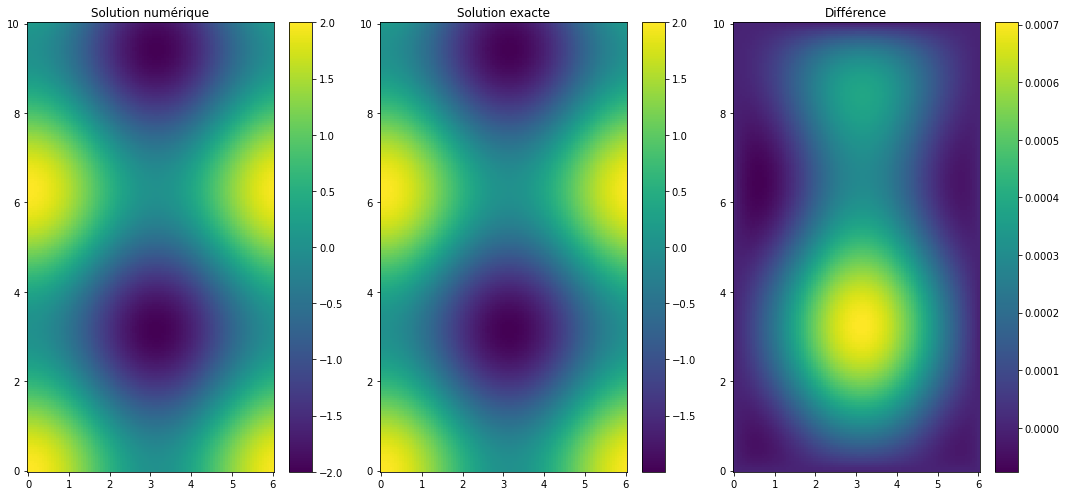

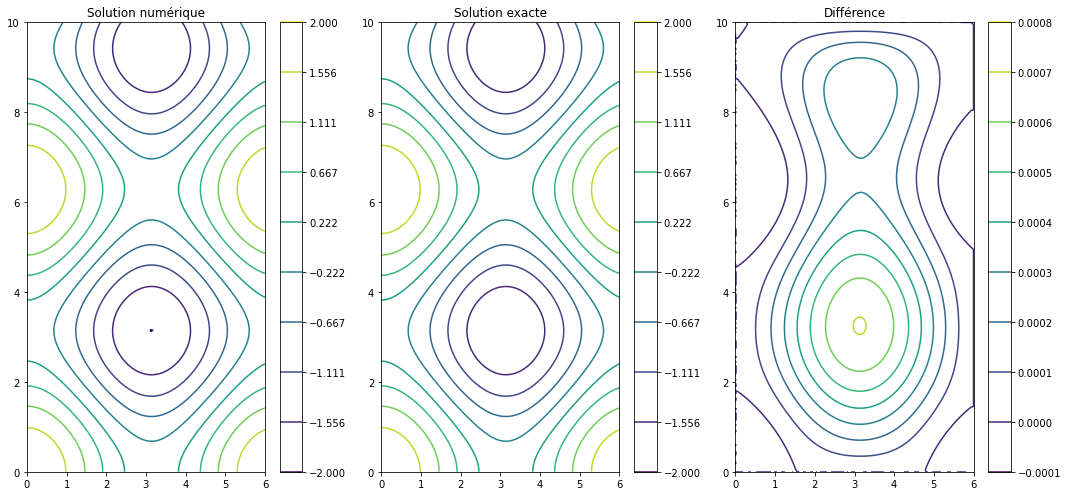

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Taille du domaine  
Lx=6
Ly=10

# résolution (attention pas mettre des valeurs trop grandes sinon pb mémoire vive)
Mx=50
My=100
# définition de la fonction g(x,y)
def gfun(x,y):
    g=-np.cos(x)-np.cos(y)
    return g

# valeur de la fonction sur le bords
def Cbord(x,y):
    C=np.cos(x)+np.cos(y)
    return C

#constantes
N=(Mx+1)*(My+1)

dx=Lx/Mx
dy=Ly/My

a=1/dx**2
b=1/dy**2
c=-2*(a+b)

# initialisation des vecteurs/matrices
g=np.zeros(N)
M=np.zeros([N,N])

#remplir la matrice et le vecteur g
for i in np.arange(0,Mx+1):   # pour i allant de 0 à Mx 
    for j in np.arange(0,My+1):   # pour i allant de 0 à My 
        
        ind=i*(My+1)+j
        indN=i*(My+1)+j+1
        indS=i*(My+1)+j-1
        indE=(i+1)*(My+1)+j
        indO=(i-1)*(My+1)+j
        
         # si ligne d'un point de bord
        if ( (i==0) or (i==Mx) or (j==0) or (j==My) ):
            
            #un sur la diagonale
            M[ind,ind]=1
            
            #valeur de la fonction sur le bord
            g[ind]=Cbord(i*dx,j*dy)
            
        else:
            
            #a,b,c,b,c sur les colonnes des points voisins
            M[ind,[indO,indS,ind,indN,indE]]=[a,b,c,b,a]
     
            #valeur de la fonction g(x,y) 
            g[ind]=gfun(i*dx,j*dy)

#solution f du problème M*f= g
temps1 = time.time()
f=np.linalg.solve(M,g)
temps2 = time.time()

#afficher temps de calcul
time = (temps2 - temps1)
print("Temps de calcul (s): {}".format(time))

#remettre sous forme matricielle
f_mat=np.zeros([My+1,Mx+1])   # attention, ordre inversé 
for i in np.arange(0,Mx+1):   # pour i allant de 0 à Mx 
    for j in np.arange(0,My+1):   # pour i allant de 0 à My
        ind=i*(My+1)+j
        f_mat[j,i]=f[ind]     # attention, ordre inversé
        
#maillage 2D
x_mat,y_mat=np.meshgrid(np.linspace(0,Lx,Mx+1),np.linspace(0,Ly,My+1))

#solution exacte
fex_mat=Cbord(x_mat,y_mat)

#visualisation
fig, (ax0, ax1,ax2) = plt.subplots(ncols=3,figsize=(15, 7))
cmap = plt.get_cmap('twilight')

im0 = ax0.pcolormesh(x_mat,y_mat,f_mat)
fig.colorbar(im0, ax=ax0)
ax0.set_title('Solution numérique')

im1 = ax1.pcolormesh(x_mat,y_mat,fex_mat)
fig.colorbar(im1, ax=ax1)
ax1.set_title('Solution exacte')

im2 = ax2.pcolormesh(x_mat,y_mat,fex_mat-f_mat)
fig.colorbar(im2, ax=ax2)
ax2.set_title('Différence')

fig.tight_layout()
plt.show()

c=np.linspace(-2,2,10)

#visualisation alter
fig, (ax0, ax1,ax2) = plt.subplots(ncols=3,figsize=(15, 7))
cmap = plt.get_cmap('twilight')

im0 = ax0.contour(x_mat,y_mat,f_mat,c)
fig.colorbar(im0, ax=ax0)
ax0.set_title('Solution numérique')

im1 = ax1.contour(x_mat,y_mat,fex_mat,c)
fig.colorbar(im1, ax=ax1)
ax1.set_title('Solution exacte')

im2 = ax2.contour(x_mat,y_mat,fex_mat-f_mat)
fig.colorbar(im2, ax=ax2)
ax2.set_title('Différence')

fig.tight_layout()
plt.show()

Remarque le petit trou qui existe dans la figure de gauche. Ceci est du à la faibe résolution utilisée ici et lié également au fait qu'on a fixé l'échelle de couleur. Dans la solution numérique on trouve une valeur minimale légèrement en dessous de $f_{min}=-2$. 

## 2. Version matrice creuse (vivement conseillée)

Le précédent code est limité en résolution car on met en mémoire tous les éléments non-nuls de la matrice $\mathbf{M}$. Ceci n'est pas nécessaire car pour résoudre $\mathbf{M}\mathbf{f} = \mathbf{g}$, on n'a que besoin de connaitre les éléments non-nuls de la matrice $\mathbf{M}$ et leur position dans cette matrice (pense au pivot de Gauss par exemple). 

Grace au format des matrices creuses, on pourra faire des économies conséquentes de mémoire et on ne sera plus autant limité en résolution. On pourra sans problème utiliser $M_x =M_y =200$ alors ça commence à être limite avec la précédente méthode. Pour résoudre les systèmes linéaires, on utilisera les librairies d'algèbre linéaire de ```scipy.sparse``` spécifiquement dédiées aux matrices creuses. 

Commençons par expliquer mieux le format de matrice creuse qu'on adoptera dans ce cours et au deuxième semestre. La matrice diagonale

$$
\mathbf{M} = \left [ \begin{array}{ccccc} 
d_0 & & & \\
& d_1 & & \\
& & \ddots & \\
& & & d_{N-2} & \\
& & & & d_{N-1}
\end{array} \right ]
$$

contient $N$ éléments non-nuls sur sa diagonale. La mise en mémoire de cette matrice sous forme réelle et en double précision, demande $N^2 \times$ 8 octets. Ainsi avec $N=10^4$ (typiquement le nombre de degrées de liberté pour $M_x = M_y =100$), on a besoin d'environ $8 \times 10^8$ soit 800 Mb de mémoire vive. Ceci n'est pas un problème pour les ordinateurs d'auourd'hui, mais ça reste néanmoins une belle quantité de données (plus qu'un cd). Si, au lieu d'enregistrer la matrice avec tous ces zéros, on enregistre, les indices de lignes, les indices de colonnes ainsi que les valeurs associés pour toutes les entrées non-nulles, on n'a besoin de seulement trois vecteurs colonnes

$$
\mathbf{row} =  \left [ \begin{array}{c} 0 \\ 1 \\ 2 \\ \vdots \\ N-2 \\ N -1 \end{array} \right ] \quad, \quad \mathbf{col} =  \left [ \begin{array}{c} 0 \\ 1 \\ 2 \\ \vdots \\ N-2 \\ N -1 \end{array} \right ] \quad, \quad \mathbf{val} =  \left [ \begin{array}{c} d_0 \\ d_1 \\ d_2 \\ \vdots \\ d_{N-2} \\ d_{N -1} \end{array} \right ]
$$

Pour mettre en mémoire ces trois vecteur  $\mathbf{row}, \mathbf{col}, \mathbf{val}$ on n'a besoin que de $3 N$ octets, soit environ 240 kb (même pas un Mb) pour $N=10^4$. Cela représente une énorme économie. Ensuite, il faut créer une structure de donnée adéquate afin que Python sache que ces trois vecteurs représentent une matrice creuse. 

En Python, on commencera par définir en effet trois vecteurs $\mathbf{row}$, $\mathbf{col}$, $\mathbf{val}$ ayant chacun la même longueur. Puis on crée la matrice creuse par l'instruction   

```
M = coo_matrix((val, (row, col)), shape=(N, N))
```

de la librairie scipy.sparse. L'instrcution ```shape=(N, N)``` informe Python que la matrice est de taille $N \times N$. On accompagnera ensuite cette instruction de 

```
M = M.tocsr() 
```

afin de convertir le format creux en un format creux comprimé (somme les entrées doubles, supprime les entrées nulles) qui est exigé par les librairies d'algèbre linéaire. La solution du système linéaire $\mathbf{M} \mathbf{f} = \mathbf{g}$ avec $\mathbf{M}$ une matrice creuse, se fera avec ```spsolve```de la librairie ```scipy.sparse```. 

```
f = spsolve(M, g)
```

Ainsi, la difficulté de l'utilisation des matrices creuses est réduite à savoir comment créer les vecteurs $\mathbf{row}, \mathbf{col}, \mathbf{val}$. Dans le cas présent, notre matrice $\mathbf{M}$ est un peu plus complexe que celle mentionnée dans l'exemple donné ci-dessus, mais on connait très bien les indices de lignes et colonnes de chaque élément non-nul. Précédemment, on initialisait la matrice $\mathbf{M}$

```
M=np.zeros([Ntot,Ntot])
```
puis on remplaçait les valeurs non-nuls à l'aide d'une boucle sur $i,j$:

```
for i in np.arange(0,Mx+1):   # pour i allant de 0 à Mx 
    for j in np.arange(0,My+1):   # pour i allant de 0 à My 
        
        ind=i*(My+1)+j
        indN=i*(My+1)+j+1
        indS=i*(My+1)+j-1
        indE=(i+1)*(My+1)+j
        indO=(i-1)*(My+1)+j
        
         # si ligne d'un point de bord
        if ( (i==0) or (i==Mx) or (j==0) or (j==My) ):
            
            #un sur la diagonale
            M[ind,ind]=1
           
        else:
            
            #a,b,c,b,c sur les colonnes des points voisins
            M[ind,[indO,indS,ind,indN,indE]]=[a,b,c,b,a]
     
```

Dans le format creux, on suit la même logique, mais au lieu d'initialisera la matrice $\mathbf{M}$, on initialisera 3 vecteurs $\mathbf{row}$, $\mathbf{col}$ et $\mathbf{val}$ comme

```
N_nonnuls=(2*Mx+2*My)+5*(Mx-1)*(My-1)
row=np.zeros(N_nonnuls)
col=np.zeros(N_nonnuls)
val=np.zeros(N_nonnuls)
````

Ici ```N_nonnuls``` correspond au nombre exacte d'éléments non-nuls dans la matrice $\mathbf{M}$: 1 entrée non-nulle pour chacun des $2 M_x + 2 M_y$ lignes des points de bords et 5 entrées non-nulles pour chacun des $(M_x-1) (M_y-1)$ point intérieurs et ça donne bien $N_{nonnuls} = 1 N_{int} + 5 N_{ext}  = (2 M_x + 2 M_y) +5 (M_x -1) (M_y -1 )$. 

Une fois initialisées, on remplira ces tableaux à l'aide d'une boucle sur i et j similaire. On utilisera une variable nommée ```offset``` qui dénombre le nombre d'éléments déjà ajoutés dans les tableaux $\mathbf{row}$, $\mathbf{col}$ et $\mathbf{val}$. Dans le code ci-dessous, nous avons placé MODIF à chaque endroit où on a modifié le code précédent. 

Temps de calcul (s): 1.2024760246276855


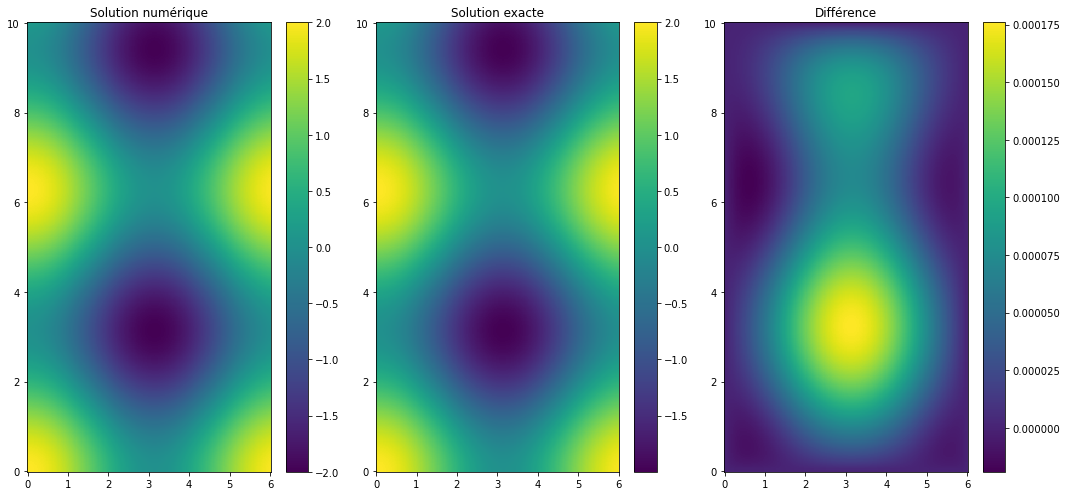

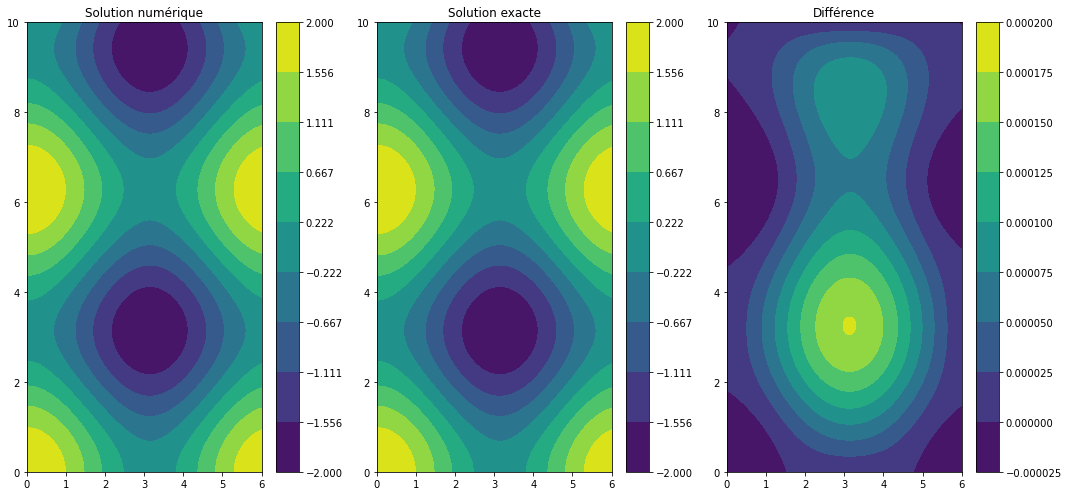

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix
from scipy.sparse.linalg import spsolve
import time

# Taille du domaine  
Lx=6
Ly=10

# résolution 
Mx=200 #200
My=400 #200

# définition de la fonction g(x,y)
def gfun(x,y):
    g=-np.cos(x)-np.cos(y)
    return g

# valeur de la fonction sur le bords
def Cbord(x,y):
    C=np.cos(x)+np.cos(y)
    return C

#constantes
N=(Mx+1)*(My+1)

dx=Lx/Mx
dy=Ly/My

a=1/dx**2
b=1/dy**2
c=-2*(a+b)

# initialisation des vecteurs/matrices
g=np.zeros(N)

#MODIF au lieu de M=np.zeros([Ntot,Ntot]), on initialise row, col, val
N_nonnuls=(2*Mx+2*My)+5*(Mx-1)*(My-1)
row=np.zeros(N_nonnuls)
col=np.zeros(N_nonnuls)
val=np.zeros(N_nonnuls)

#MODIF remplir les vecteurs row, col et val et le vecteur g
offset=-1  #indice offset (nombre d'éléments ajoutés à (row,val,col) -1)
for i in np.arange(0,Mx+1):   # pour i allant de 0 à Mx 
    for j in np.arange(0,My+1):   # pour i allant de 0 à My 
        
        ind=i*(My+1)+j
        indN=i*(My+1)+j+1
        indS=i*(My+1)+j-1
        indE=(i+1)*(My+1)+j
        indO=(i-1)*(My+1)+j
        
         # si ligne d'un point de bord
        if ( (i==0) or (i==Mx) or (j==0) or (j==My) ):
            
            #un sur la diagonale
            #MODIF au lieu de M[ind,ind]=1
            row[offset+1]=ind
            col[offset+1]=ind
            val[offset+1]=1
            offset=offset+1   # on vient d'ajouter 1 élément et on incrément donc offset de 1
            
            #valeur de la fonction sur le bord
            g[ind]=Cbord(i*dx,j*dy)
            
        else:
            
            #a,b,c,b,a sur les colonnes des points voisins
            #MODIF au lieu de M[ind,[indO,indS,ind,indN,indE]]=[a,b,c,b,a]
            row[offset+(np.arange(1,5+1))]=[ind,ind,ind,ind,ind]
            col[offset+(np.arange(1,5+1))]=[indO,indS,ind,indN,indE]
            val[offset+(np.arange(1,5+1))]=[a,b,c,b,a]
            offset=offset+5   # on vient d'ajouter 5 éléments et on incrément donc offset de 5
    
            #valeur de la fonction g(x,y) 
            g[ind]=gfun(i*dx,j*dy)

#MODIF création de la matrice creuse
M=coo_matrix((val, (row, col)), shape=(N, N))

#solution du problème 
#MODIF au lieu f=np.linalg.solve(M,g)
M = M.tocsr()    #on convertit la matrice M en un format comprimé pour pouvoir utiliser spsolve
temps1 = time.time()
f = spsolve(M, g)
temps2 = time.time()

#afficher temps de calcul
time = (temps2 - temps1)
print("Temps de calcul (s): {}".format(time))

#remettre sous forme matricielle
f_mat=np.zeros([My+1,Mx+1])   # attention, ordre inversé 
for i in np.arange(0,Mx+1):   # pour i allant de 0 à Mx 
    for j in np.arange(0,My+1):   # pour i allant de 0 à My
        ind=i*(My+1)+j
        f_mat[j,i]=f[ind]     # attention, ordre inversé

#maillage 2D
x_mat,y_mat=np.meshgrid(np.linspace(0,Lx,Mx+1),np.linspace(0,Ly,My+1))

#solution exacte
fex_mat=Cbord(x_mat,y_mat)

#visualisation
fig, (ax0, ax1,ax2) = plt.subplots(ncols=3,figsize=(15, 7))
cmap = plt.get_cmap('twilight')

im0 = ax0.pcolormesh(x_mat,y_mat,f_mat)
fig.colorbar(im0, ax=ax0)
ax0.set_title('Solution numérique')

im1 = ax1.pcolormesh(x_mat,y_mat,fex_mat)
fig.colorbar(im1, ax=ax1)
ax1.set_title('Solution exacte')

im2 = ax2.pcolormesh(x_mat,y_mat,fex_mat-f_mat)
fig.colorbar(im2, ax=ax2)
ax2.set_title('Différence')

fig.tight_layout()
plt.show()

c=np.linspace(-2,2,10)

#visualisation alter
fig, (ax0, ax1,ax2) = plt.subplots(ncols=3,figsize=(15, 7))
cmap = plt.get_cmap('twilight')

im0 = ax0.contourf(x_mat,y_mat,f_mat,c)
fig.colorbar(im0, ax=ax0)
ax0.set_title('Solution numérique')

im1 = ax1.contourf(x_mat,y_mat,fex_mat,c)
fig.colorbar(im1, ax=ax1)
ax1.set_title('Solution exacte')

im2 = ax2.contourf(x_mat,y_mat,fex_mat-f_mat)
fig.colorbar(im2, ax=ax2)
ax2.set_title('Différence')

fig.tight_layout()
plt.show()

Il est utile de prendre consience du fait qu'on vient de résoudre un système linéaire  $\mathbf{M} \mathbf{f} = \mathbf{g}$ avec $\mathbf{M}$ une sacrée matrice de dimension   $40000 \times 40000$ environ à N=200 en juste un peu plus que 2s de temps de calcul. 